## Assignment2 - Supervised Learning flow

### Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [ ]:
# student 1: Liron 7834
# student 2: Tomas 7294
# student 3: Noy 9887
# student 4: Coral 1174
# student 5: Michal 2113
# student 6: Eliran 0634

## Part 2 - Experiments
You could add as many code cells as needed

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.pipeline import Pipeline, make_pipeline



**חלק 1 שלב א**

 טעינת הדאטה סט

In [ ]:
wine_test = pd.read_csv("wine_test.csv")
wine_train = pd.read_csv("wine_train.csv")


In [ ]:
wine_test.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


In [ ]:
wine_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


**חלק 1 שלב ב**

EDA Stage


**טבלאות סטטיסטיות**

2 Tables:
- General statistical information regarding the features
- Closer examination of the 'Alcohol feature' (Frequency Disturbution)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
min,11.410000,0.740000,1.360000,10.600000,78.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.480000,1.290000,278.000000,0.000000
max,14.750000,5.650000,3.230000,30.000000,151.000000,3.880000,5.080000,0.630000,3.580000,11.750000,1.450000,4.000000,1680.000000,2.000000
mean,12.997254,2.297746,2.361690,19.419718,99.943662,2.315986,2.063592,0.346690,1.561901,5.030211,0.958563,2.638873,742.457746,0.922535
std,0.789931,1.093317,0.283231,3.354815,13.683751,0.639469,1.005302,0.117562,0.540979,2.239593,0.219631,0.718083,317.250905,0.772524


,Ranges,Frequency
0,11.4-12,17
1,12-12.5,26
2,12.5-13,26
3,13-13.5,31
4,13.5-14,26
5,14-14.75,16


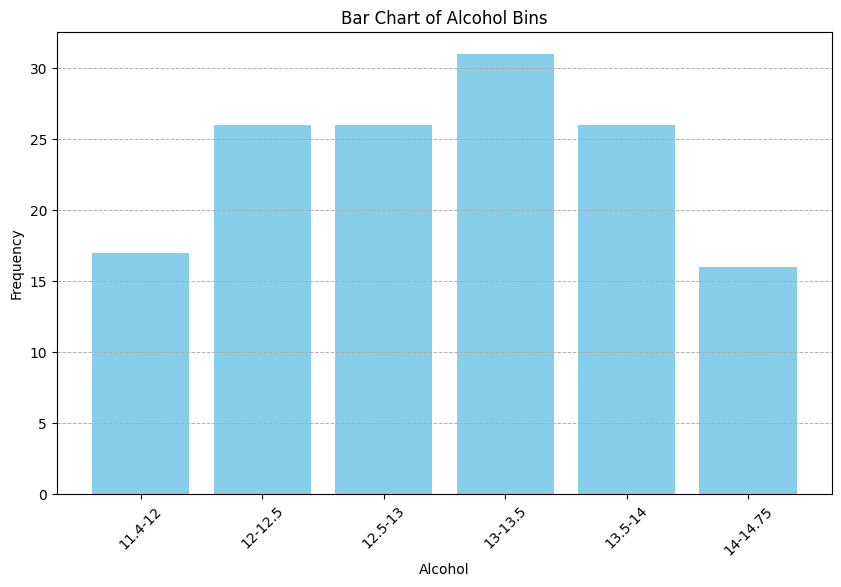

In [ ]:

summary_stats = wine_train.describe().loc[['min', 'max', 'mean', 'std']]

#Show stats table
summary_stats_html = summary_stats.style.set_caption("Summary Statistics")
display(summary_stats_html)

wine_train_copy = wine_train.copy()

#Show alcohol freq table for distribution
wine_train_copy['alcohol_bins'] = pd.cut(
    wine_train_copy['alcohol'],
    bins=[11.4, 12, 12.5, 13, 13.5, 14, 14.75],
    labels=['11.4-12', '12-12.5', '12.5-13', '13-13.5', '13.5-14', '14-14.75']
)
print("\n")
frequency_table_bins = wine_train_copy['alcohol_bins'].value_counts().sort_index().reset_index()
frequency_table_bins.columns = ['Ranges', 'Frequency']

frequency_table_html = frequency_table_bins.style.set_caption("Frequency Table of Alcohol Bins")
display(frequency_table_html)

plt.figure(figsize=(10, 6))
plt.bar(frequency_table_bins['Ranges'], frequency_table_bins['Frequency'], color='skyblue')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.title('Bar Chart of Alcohol Bins')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)

plt.show()

**גרפים**
We chose to dedicate more work to the graph section of the EDA as
it's more interesting for continious features.

3 Graphs:
- Multi-Dimensional Heatmap graph which shows correlation between the features
- Deeper look into a scatterplot graph of high correlation between two features (Positive correlation)
- Graph that shows correlation between an impactful feature and the Target Prediction column (Negative correlation)

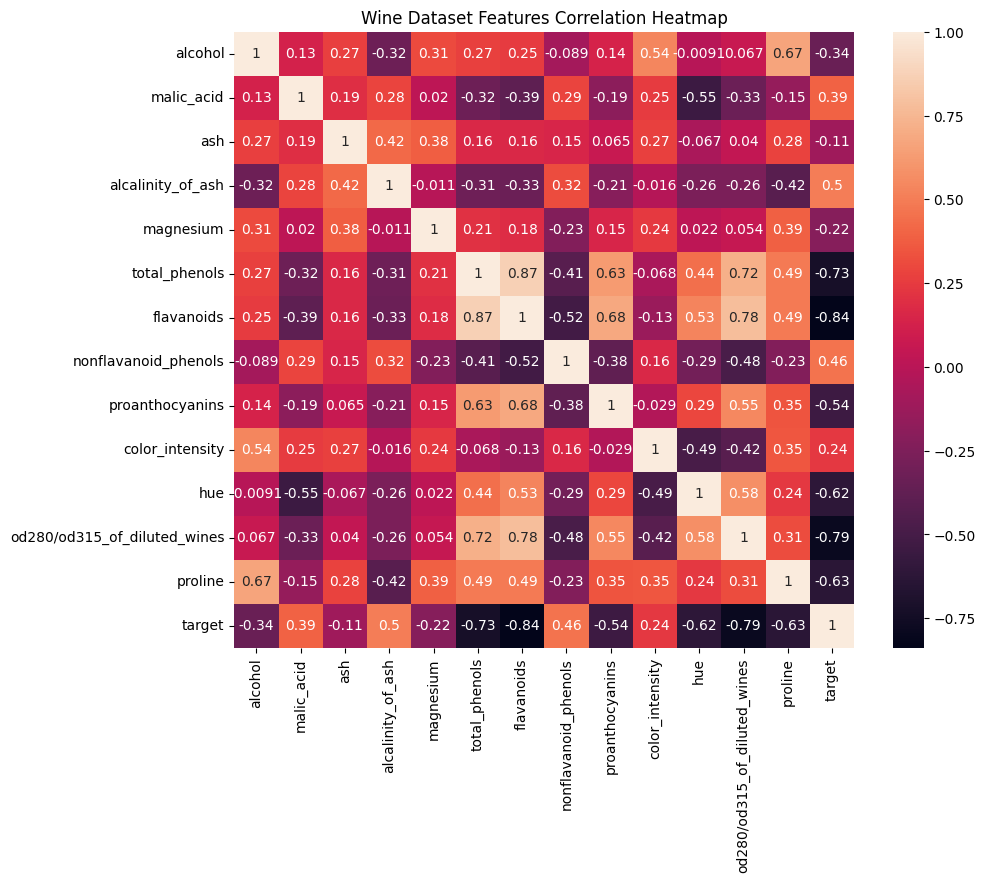

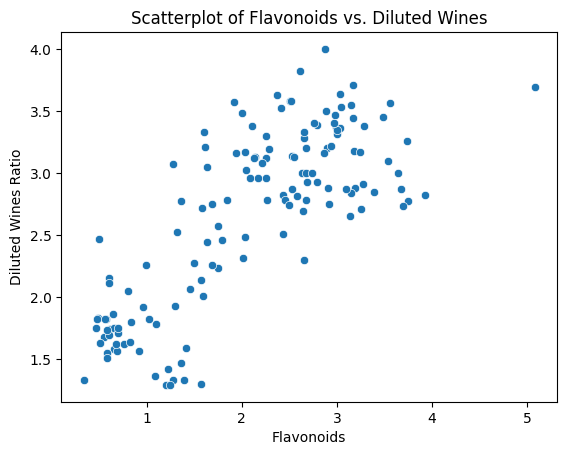

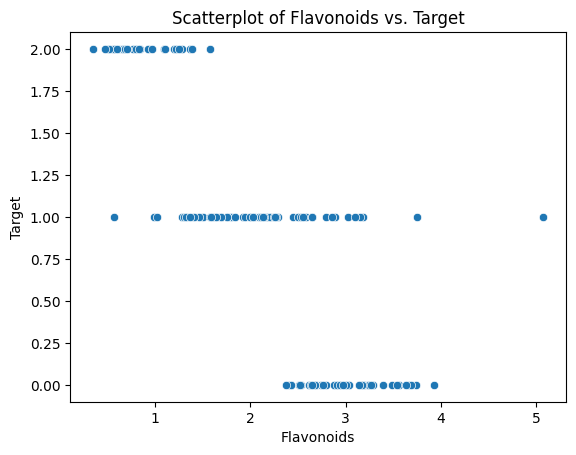

In [ ]:
#2 Graphs for EDA

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(wine_train.corr(), annot=True)

plt.title("Wine Dataset Features Correlation Heatmap")  # Add a title
plt.show()

sns.scatterplot(x="flavanoids", y="od280/od315_of_diluted_wines", data=wine_train)
plt.ylabel("Diluted Wines Ratio")
plt.xlabel("Flavonoids")
plt.title("Scatterplot of Flavonoids vs. Diluted Wines")
plt.show()

sns.scatterplot(x="flavanoids", y="target", data=wine_train)
plt.ylabel("Target")
plt.xlabel("Flavonoids")
plt.title("Scatterplot of Flavonoids vs. Target")
plt.show()


**Feature Engineering Stage**

**We have chosen Feature Scaling for our Feature Engineering:**
We will scale both our features using 2 scaling methods learned in class:
* T-Score Scaling
* MinMax Scaling

T-Score = We take the Data and scale it between the boundaries [-1, 1], 0 is the mean of the feature.

Easy to understand from the scaling which values are far from the mean

MinMax - We take the values and normalize them between [0, 1], a simpler approach.

In [ ]:
# No scaling
print("No Scaling:")
display(wine_train.head())

# Standard scaler
print("\nStandard Scaler:")
selected_features_df_T = wine_train.copy()
scaler = StandardScaler()
scaled_features_df_T = scaler.fit_transform(selected_features_df_T)
scaled_features_df_T = pd.DataFrame(scaled_features_df_T, columns=selected_features_df_T.columns)
display(scaled_features_df_T.head())

# MinMaxScaler
print("\nMinMaxScaler:")
selected_features_df_MM = wine_train.copy()
scaler = MinMaxScaler()
scaled_features_df_MM = scaler.fit_transform(selected_features_df_MM)
scaled_features_df_MM = pd.DataFrame(scaled_features_df_MM, columns=selected_features_df_MM.columns)
display(scaled_features_df_MM.head())


No Scaling:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2



Standard Scaler:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,-1.165293,-0.429338,-0.147716,-0.275119,-1.389292,-1.123620,-0.562603,1.479415,0.144876,-1.178572,0.554869,-0.515510,-0.830216,0.10063
1,0.740330,0.259077,1.163262,1.519686,0.370822,-1.202087,-1.221446,0.369703,-0.040628,1.626473,-0.998662,-1.172348,0.023858,1.39967
2,-0.796872,-1.246256,-3.549173,-2.638279,-0.875925,-0.527274,-1.490973,-0.569283,-2.118278,-1.380213,0.417793,-1.144397,-0.703687,0.10063
3,-1.495601,-0.530305,-1.706717,0.024015,-1.022601,0.288779,-0.422849,0.198979,-0.263233,-1.330923,-0.084820,-0.277931,-1.035826,0.10063
4,0.206756,1.167784,-0.750057,0.472716,0.150808,-1.280554,-1.510938,0.711153,-0.485839,-0.461628,-1.638351,-1.340051,0.276917,1.39967



MinMaxScaler:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,0.200599,0.221996,0.513369,0.407216,0.041096,0.213793,0.244726,0.78,0.386076,0.106972,0.618557,0.361624,0.144080,0.5
1,0.649701,0.374745,0.711230,0.716495,0.369863,0.196552,0.105485,0.52,0.354430,0.704871,0.268041,0.188192,0.336662,1.0
2,0.287425,0.040733,0.000000,0.000000,0.136986,0.344828,0.048523,0.30,0.000000,0.063992,0.587629,0.195572,0.172611,0.5
3,0.122754,0.199593,0.278075,0.458763,0.109589,0.524138,0.274262,0.48,0.316456,0.074499,0.474227,0.424354,0.097718,0.5
4,0.523952,0.576375,0.422460,0.536082,0.328767,0.179310,0.044304,0.60,0.278481,0.259790,0.123711,0.143911,0.393723,1.0


**Training Stage:**

We will test 2 ML algoirthms:

* KNN
* Decision Trees

We will test the algorithms with the different scaling methods shown before. We will do it using five cross validtion method using grid_search technique to select optimal parameters for the algorithms.

To make the coding easy, we will implement a pipeline to run the different models with the different combinations and parameters

**Note:** before we start we will shuffle the wine_train set to make sure we don't get any biased results.

In [ ]:
wine_train = wine_train.sample(frac=1, random_state=42).reset_index(drop=True)

**A)** Initinalize the models, hyper-parameters tables, and pipelines for the evaluation process

In [ ]:

# Define models
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

# Sample parameter grids for KNN and Decision Tree
knn_param_grid = {
    'model__n_neighbors': [3, 5, 7, 9],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan']
}

dt_param_grid = {
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10]
}

# Pipelines for different scalers
pipelines = [
    ('No Scaling KNN', Pipeline([('model', knn)]), knn_param_grid),
    ('StandardScaler KNN', Pipeline([('scaler', StandardScaler()), ('model', knn)]), knn_param_grid),
    ('MinMaxScaler KNN', Pipeline([('scaler', MinMaxScaler()), ('model', knn)]), knn_param_grid),
    ('No Scaling DT', Pipeline([('model', dt)]), dt_param_grid),
    ('StandardScaler DT', Pipeline([('scaler', StandardScaler()), ('model', dt)]), dt_param_grid),
    ('MinMaxScaler DT', Pipeline([('scaler', MinMaxScaler()), ('model', dt)]), dt_param_grid)
]

**B)** Writing the testing function:

In [ ]:
def grid_search_evaluate(model, param_grid, X_train, X_test, y_train, y_test, method='None'):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_macro')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X_test)
    macro_avg_f1 = round(f1_score(y_test, predictions, average='macro'), 3)
    best_params = grid_search.best_params_
    best_k = best_params.get('model__n_neighbors', None)
    best_metric = best_params.get('model__metric', None)
    best_weight = best_params.get('model__weights', None)
    max_depth = best_params.get('model__max_depth', None)
    if max_depth is None and isinstance(best_model.named_steps['model'], DecisionTreeClassifier):
        max_depth = best_model.named_steps['model'].tree_.max_depth
    min_samples_split = best_params.get('model__min_samples_split', None)
    return pd.DataFrame({
        'Method': method,
        'Model': type(model.named_steps['model']).__name__,
        'Type': 'Grid Search',
        'Macro-Average F1': macro_avg_f1,
        'Best k': best_k,
        'Best Metric': best_metric,
        'Best Weight': best_weight,
        'Max Depth': max_depth,
        'Min Samples Split': min_samples_split
    }, index=[0])


In [ ]:
# tTarget column name
target_column = 'target'

# Split to x,y
X = wine_train.drop(columns=[target_column])
y = wine_train[target_column]

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DF Initilization
grid_search_results_dfs = []

# KNN / DT evaluation with the pipelines
for method_name, pipeline, param_grid in pipelines:
    scaler = pipeline.named_steps.get('scaler')
    if scaler:
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        grid_search_results_dfs.append(grid_search_evaluate(pipeline, param_grid, X_train_scaled, X_test_scaled, y_train, y_test, method=method_name))
    else:
        grid_search_results_dfs.append(grid_search_evaluate(pipeline, param_grid, X_train, X_test, y_train, y_test, method=method_name))

# Merge results to a single Dataframe
grid_search_results_df = pd.concat(grid_search_results_dfs, ignore_index=True)

# Display the final DataFrame
print("Grid Search Results:")
display(grid_search_results_df)

Grid Search Results:


,Method,Model,Type,Macro-Average F1,Best k,Best Metric,Best Weight,Max Depth,Min Samples Split
0,No Scaling KNN,KNeighborsClassifier,Grid Search,0.729,9,manhattan,uniform,None,None
1,StandardScaler KNN,KNeighborsClassifier,Grid Search,0.968,7,manhattan,uniform,None,None
2,MinMaxScaler KNN,KNeighborsClassifier,Grid Search,0.968,7,manhattan,uniform,None,None
3,No Scaling DT,DecisionTreeClassifier,Grid Search,0.930,None,None,None,20,2
4,StandardScaler DT,DecisionTreeClassifier,Grid Search,0.968,None,None,None,5,2
5,MinMaxScaler DT,DecisionTreeClassifier,Grid Search,0.968,None,None,None,10,2


**Scaling Test analysis:**


**We can see main conclusion: Scaling helps with the classifying algoirthms.** (20%+ difference)

However we decied to not scale DT algorithm, as we learned in class it has little to even negative effect on the performance

Both scaling methods are great, and because there's no substantial difference, we'll stay with standard scaling.

We prefer KNN over DT as it's slightly better with it's optimal parameters.

## Part 3 - Training flow
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 2)

In [ ]:
# Define the best model parameters
best_scaler = StandardScaler()
best_model = KNeighborsClassifier(n_neighbors=7, metric='manhattan', weights='uniform')

# Create a pipeline with the best scaler and model
best_pipeline = make_pipeline(best_scaler, best_model)

# Train the best pipeline on the entire wine_train dataset
X_full_train = wine_train.drop(columns=[target_column])
y_full_train = wine_train[target_column]

# Fit the pipeline to the entire training data
best_pipeline.fit(X_full_train, y_full_train)

# Output the trained pipeline
print("Best model pipeline trained on the entire dataset:")
print(best_pipeline)

Best model pipeline trained on the entire dataset:
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=7))])


**Reminder:** We shuffle our datasets to ensure non-biased results before testing

In [ ]:
wine_test = wine_test.sample(frac=1, random_state=42).reset_index(drop=True)

## Part 4 - Apply on test and show model performance estimation

In [ ]:
best_predictions = best_pipeline.predict(X_test)
best_f1_score = round(f1_score(y_test, best_predictions, average='macro'), 3)

naive_knn = KNeighborsClassifier()
naive_knn.fit(X_full_train, y_full_train)
naive_predictions = naive_knn.predict(X_test)
naive_f1_score = round(f1_score(y_test, naive_predictions, average='macro'), 3)

comparison_df = pd.DataFrame({
    'Method': ['Our best KNN Model', 'Naive KNN'],
    'F1 Score': [best_f1_score, naive_f1_score],
    'Parameters': [
        'n_neighbors=7, metric=manhattan, weights=uniform, scaler=StandardScaler',
        'n_neighbors=5, weights=uniform, algorithm=auto, leaf_size=30, p=2, metric=minkowski, metric_params=None, n_jobs=None'
    ]
})

print("Comparison of Best Model and Naive KNN on Test Data (~20% score improvement):")
display(comparison_df)


Comparison of Best Model and Naive KNN on Test Data (~20% score improvement):


,Method,F1 Score,Parameters
0,Our best KNN Model,0.968,"n_neighbors=7, metric=manhattan, weights=unifo..."
1,Naive KNN,0.774,"n_neighbors=5, weights=uniform, algorithm=auto..."


**Summary:**

To sum up the main conclusion for the assignment, it's very important to understand the use of cross evaluation, and grid search to find the optimal parameters for the desired ML algorithm, it is also important to choose a proper scaling method, if the algorithm performance can benefit from it.